In [23]:
#Installing and importing libraries
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install bokeh
!pip install matplotlib.pyplot
!pip install numpy
!pip install textwrap
!pip install os
!pip install re
!pip install math

import pandas as pd
import seaborn as sns
import plotly as px
import bokeh as bh
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import textwrap
import os
import re
import math

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


ERROR: Could not find a version that satisfies the requirement textwrap (from versions: none)
ERROR: No matching distribution found for textwrap
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [29]:
#Programmable Variables

#Copy file path to data, make sure to re-save excel file as a CSV format
dataframe = pd.read_csv(r"S:\Shared Folders\INTERN\Projects\ABCD_REBUILD\2023ABCD_oct02 CSV.csv")

#Gets rid of leading and Trailing Spaces in PHO Names
dataframe['pho'] = dataframe['pho'].str.strip()

#This is the metric you want to examine
metric = 'Medicare Annual Wellness Visit (AWV) Custom (66+)'

#This boolean value determines if the metric is better when low, set metric low = True
metric_low = False

#These are for the bridges goal value and the coloring
bridges_goal = 0.60
metric_width_color = .10

#Define the path to the intended directory
downloads_directory = os.path.expanduser(r"S:\Shared Folders\INTERN\Projects\ABCD_REBUILD\Test for Meeting")

In [30]:
#Get the Unique Metric Names to put in metric section
print(dataframe['metric_name'].unique())

['Medicare Annual Wellness Visit (AWV) Custom (66+)'
 'Controlling High Blood Pressure CBP HEDIS® MY2022 - Adjusted, Certified'
 'Breast Cancer Screening BCS HEDIS® MY2022 - Adjusted, Certified'
 'Colorectal Cancer Screening COL HEDIS® MY 2022 - Adjusted, Certified'
 'Hemoglobin A1c Control for Patients With Diabetes (HbA1C Poor Control >9.0) HBD HEDIS® MY 2023 - Adjusted, Certified'
 'Preventive Care and Screening: Screening for Depression and Follow-Up Plan CMS2v12']


In [31]:
#Running Calculations and creating data frame
dataframe['practice'] = dataframe['practice'].str.lower()
dataframe['practice'] = dataframe['practice'].str.replace('family medicine', 'fm')
dataframe['practice'] = dataframe['practice'].str.replace('primary care', 'pc')
dataframe['practice'] = dataframe['practice'].str.replace('family practice', 'fp')
dataframe['practice'] = dataframe['practice'].str.replace('internal medicine', 'internal')
dataframe['practice'] = dataframe['practice'].str.replace('integrative medicine', 'integrative')
    
#Grouping the data by PHO
pho_grouped = dataframe.groupby('pho')

pho_butler = dataframe.loc[(dataframe['pho'] == 'Butler PHO')]
pho_butler_metric = pho_butler.loc[pho_butler['metric_name'] == metric]

#Calculating the numerators and denominators for the metric
pho_butler_metric_numerator = pho_butler_metric.loc[pho_butler_metric['passed'] == True].shape[0]
pho_butler_metric_denominator = pho_butler_metric.shape[0]

#Calculating Performance
pho_butler_performance = pho_butler_metric_numerator / pho_butler_metric_denominator

#Genesis
pho_genesis = dataframe.loc[dataframe['pho'] == 'Genesis ACO']
pho_genesis_metric = pho_genesis.loc[pho_genesis['metric_name'] == metric]

# Calculating the numerators and denominators for the metric
pho_genesis_metric_numerator = pho_genesis_metric.loc[pho_genesis_metric['passed'] == True].shape[0]
pho_genesis_metric_denominator = pho_genesis_metric.shape[0]

# Calculating Performance
pho_genesis_performance = pho_genesis_metric_numerator / pho_genesis_metric_denominator

#Washington
pho_washington = dataframe.loc[(dataframe['pho'] == 'Washington PHO')]
pho_washington_metric = pho_washington.loc[pho_washington['metric_name'] == metric]

# Calculating the numerators and denominators for the metric
pho_washington_metric_numerator = pho_washington_metric.loc[pho_washington_metric['passed'] == True].shape[0]
pho_washington_metric_denominator = pho_washington_metric.shape[0]

# Calculating Performance
pho_washington_performance = pho_washington_metric_numerator / pho_washington_metric_denominator

#St. Clair
pho_stclair = dataframe.loc[dataframe['pho'] == 'St. Clair ACO']
pho_stclair_metric = pho_stclair.loc[pho_stclair['metric_name'] == metric]

# Calculating the numerators and denominators for the metric
pho_stclair_metric_numerator = pho_stclair_metric.loc[pho_stclair_metric['passed'] == True].shape[0]
pho_stclair_metric_denominator = pho_stclair_metric.shape[0]

# Calculating Performance
pho_stclair_performance = pho_stclair_metric_numerator / pho_stclair_metric_denominator

#Excela Health
pho_excela = dataframe.loc[dataframe['pho'] == 'Excela Health PHO']
pho_excela_metric = pho_excela.loc[pho_excela['metric_name'] == metric]

# Calculating the numerators and denominators for the metric
pho_excela_metric_numerator = pho_excela_metric.loc[pho_excela_metric['passed'] == True].shape[0]
pho_excela_metric_denominator = pho_excela_metric.shape[0]

# Calculating Performance
pho_excela_performance = pho_excela_metric_numerator / pho_excela_metric_denominator


#Getting the total bridges performance
total_numerator = pho_butler_metric_numerator + pho_genesis_metric_numerator + pho_washington_metric_numerator + pho_stclair_metric_numerator + pho_excela_metric_numerator

total_denominator = pho_butler_metric_denominator + pho_genesis_metric_denominator + pho_washington_metric_denominator + pho_stclair_metric_denominator + pho_excela_metric_denominator

bridges_total_performance = total_numerator / total_denominator

In [32]:
# Define color conditions
def get_color(row):
    diff = row['performance'] - bridges_goal
    
    #Bridges Goal Bar
    if diff == 0:
        return 'green'
    
    if (metric_low == True):
        if diff <= 0:
            return 'green'
        elif -metric_width_color < diff < metric_width_color:
            return 'yellow'
        else:
            return 'red'
    else:
        if diff >= 0:
            return 'green'
        elif -metric_width_color < diff < bridges_goal:
            return 'yellow'
        else:
            return 'red'

C:\Users\Jacob.Mazurkiewicz\AppData\Local\Temp\ipykernel_24144\2100606330.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data['practice'] = table_data['practice'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=55)))


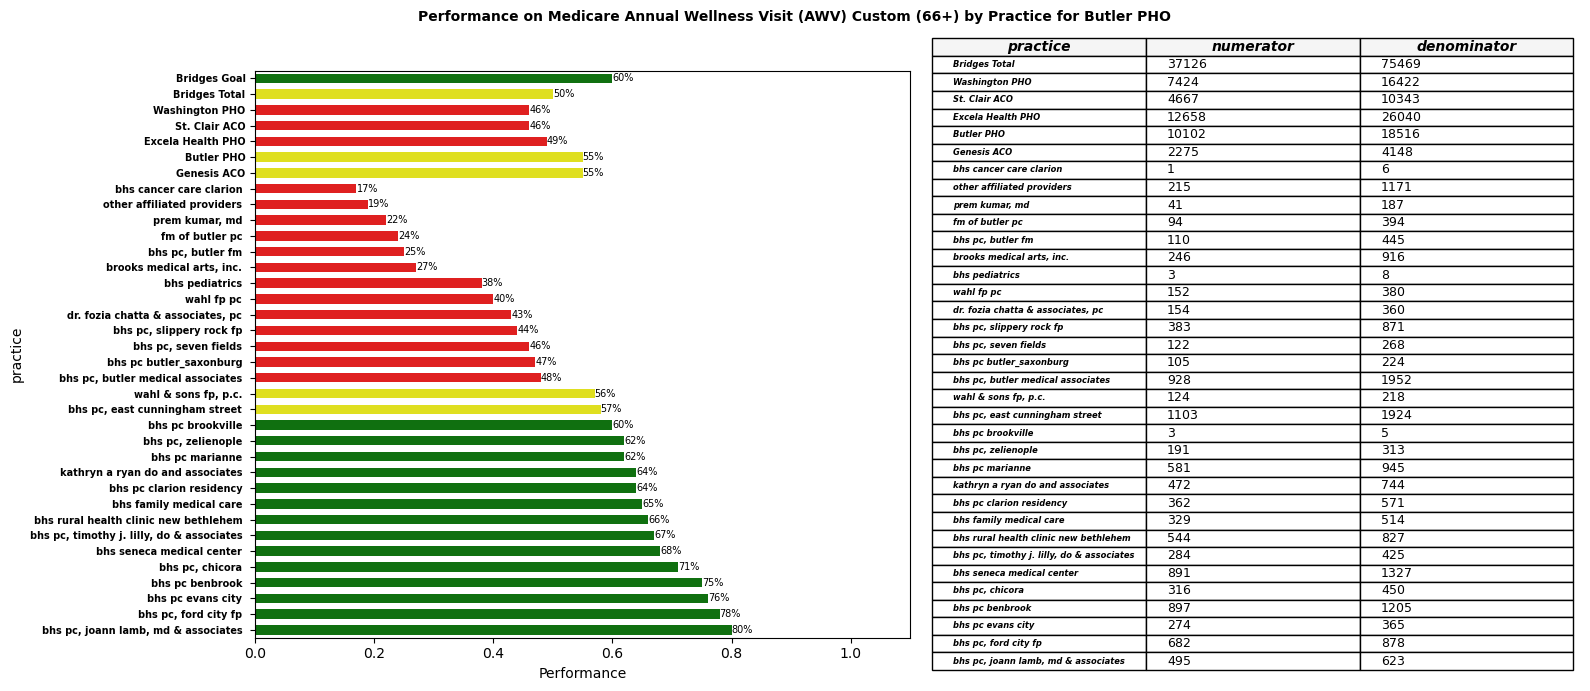

C:\Users\Jacob.Mazurkiewicz\AppData\Local\Temp\ipykernel_24144\2100606330.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data['practice'] = table_data['practice'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=55)))


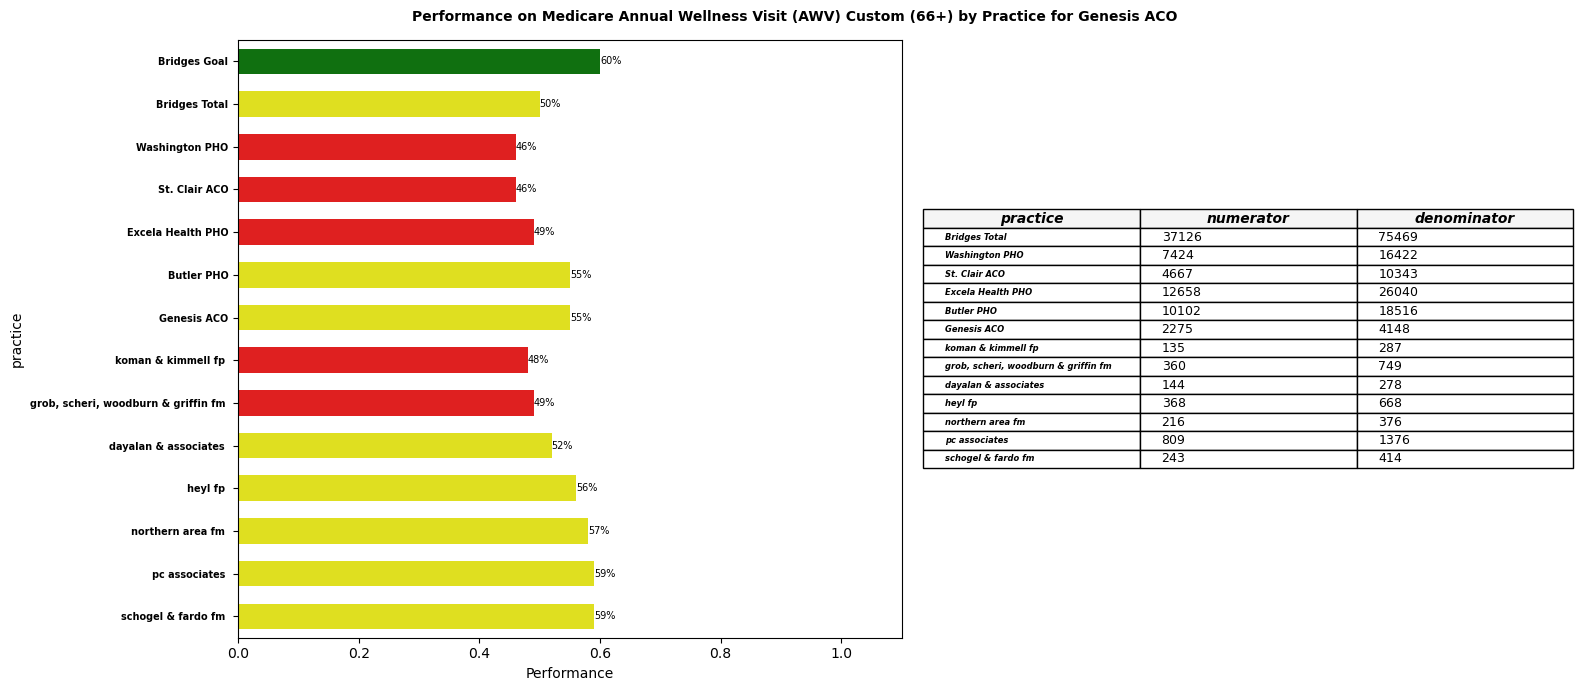

C:\Users\Jacob.Mazurkiewicz\AppData\Local\Temp\ipykernel_24144\2100606330.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data['practice'] = table_data['practice'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=55)))


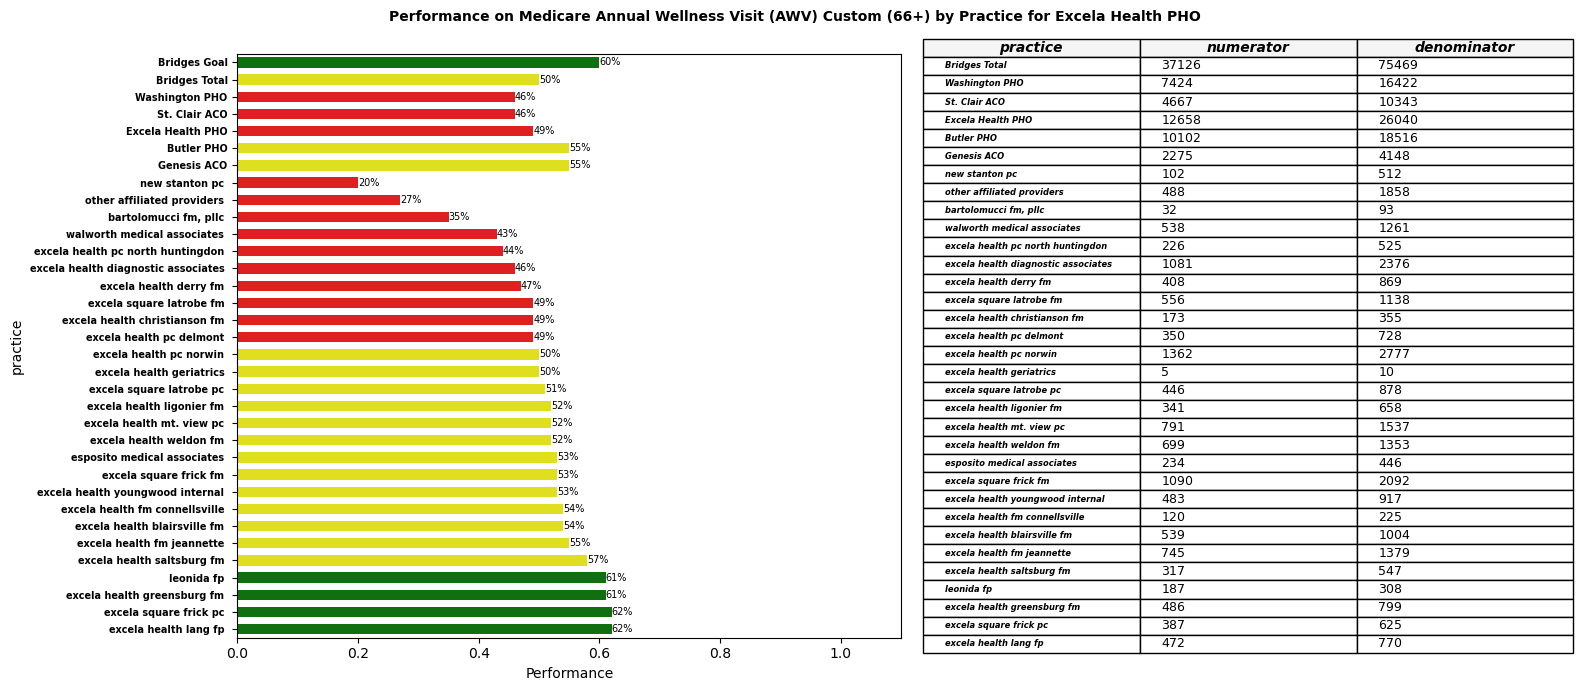

C:\Users\Jacob.Mazurkiewicz\AppData\Local\Temp\ipykernel_24144\2100606330.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data['practice'] = table_data['practice'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=55)))


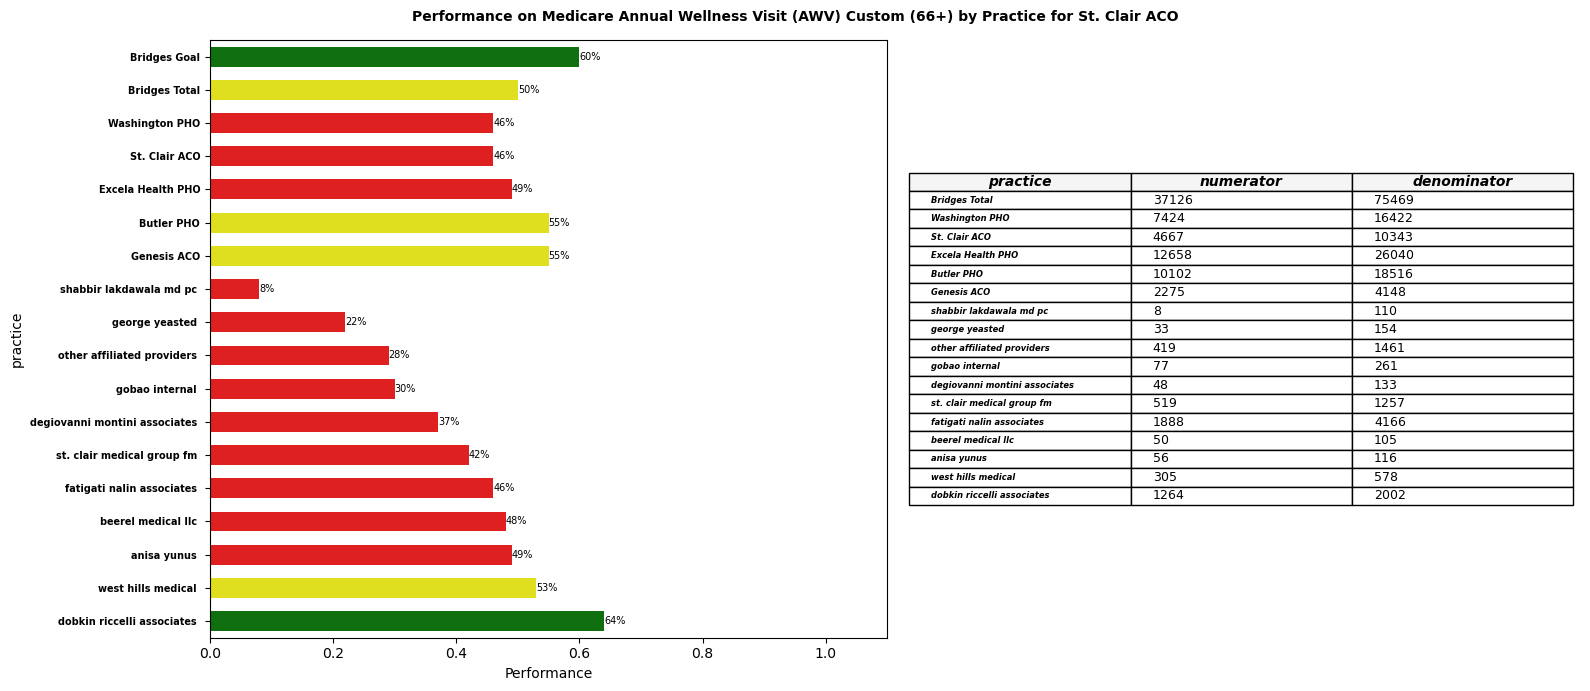

C:\Users\Jacob.Mazurkiewicz\AppData\Local\Temp\ipykernel_24144\2100606330.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data['practice'] = table_data['practice'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=55)))


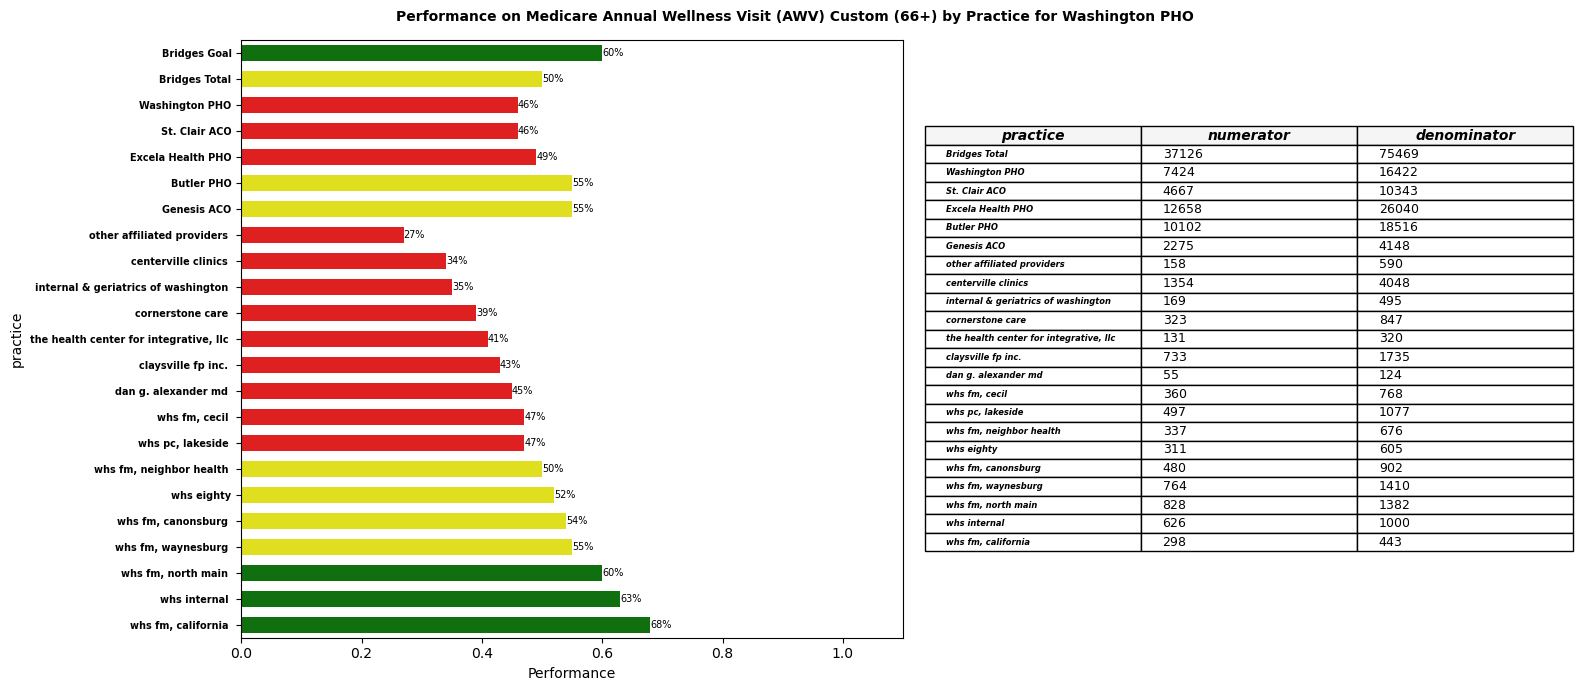

In [33]:
# Create a list of unique PHO names
unique_phos = dataframe['pho'].unique()


# Create a directory to store the visualizations if it doesn't exist in 'Downloads'
output_directory = os.path.join(downloads_directory, 'ABCD Visualizations')
if not os.path.exists(output_directory):
    os.makedirs(output_directory)


for pho in unique_phos:
            # Filter the data for the current PHO
            pho_data = dataframe.loc[dataframe['pho'] == pho]

            pho_data = pho_data.loc[pho_data['metric_name'] == metric]

            agg_df = pho_data.groupby('practice')['passed'].agg(['sum', 'count']).reset_index()
            agg_df.rename(columns={'sum': 'numerator', 'count': 'denominator'}, inplace=True)
            agg_df['performance'] = agg_df['numerator'] / agg_df['denominator']
            agg_df['performance'] = agg_df['performance'].apply(lambda x: math.ceil(x * 100) / 100)

            # Now, add the new calculations as rows to the existing agg_df
            new_rows = pd.DataFrame(
                {'practice': ['Butler PHO', 'Genesis ACO', 'Washington PHO', 'St. Clair ACO', 'Excela Health PHO'],
                 'numerator': [pho_butler_metric_numerator, pho_genesis_metric_numerator, pho_washington_metric_numerator,
                               pho_stclair_metric_numerator, pho_excela_metric_numerator],
                 'denominator': [pho_butler_metric_denominator, pho_genesis_metric_denominator,
                                 pho_washington_metric_denominator,
                                 pho_stclair_metric_denominator, pho_excela_metric_denominator],
                 'performance': [pho_butler_performance, pho_genesis_performance, pho_washington_performance,
                                 pho_stclair_performance, pho_excela_performance]})
            new_rows['performance'] = new_rows['performance'].apply(lambda x: math.ceil(x * 100) / 100)

            # Adding in the bridges goal row
            new_row = pd.DataFrame(
                {'practice': ['Bridges Goal'],
                 'numerator': [0],
                 'denominator': [0],
                 'performance': [bridges_goal]})
            new_row['performance'] = new_row['performance'].apply(lambda x: math.ceil(x * 100) / 100)
            
            new_row_2 = pd.DataFrame(
                {'practice': ['Bridges Total'],
                 'numerator': [total_numerator],
                 'denominator': [total_denominator],
                 'performance': [bridges_total_performance]})
            new_row_2['performance'] = new_row_2['performance'].apply(lambda x: math.ceil(x * 100) / 100)

            # Sorting rows and coloring bars
            new_rows_sorted = new_rows.sort_values(by='performance', ascending=True)
            agg_df_sort = agg_df.sort_values(by='performance', ascending=True)

            # Sort the DataFrame by 'performance' in ascending order
            agg_df_sorted = pd.concat([new_row, new_row_2, new_rows_sorted, agg_df_sort], ignore_index=True)

            # Apply the color function to each row
            agg_df_sorted['bar_color'] = agg_df_sorted.apply(get_color, axis=1)

            # Create a larger horizontal bar chart with the table on the right
            plt.figure(figsize=(16, 7))  # Adjust the figure size as needed

            # Create a subplot for the horizontal bar chart
            plt.subplot(121)
            ax = sns.barplot(data=agg_df_sorted, x='performance', y='practice', palette=agg_df_sorted['bar_color'], width=.6)
            plt.xlabel('Performance')
            ax.set_yticklabels(labels=agg_df_sorted['practice'], fontsize=7, fontweight='bold')
            plt.xlim(0, 1.1)
            plt.suptitle(f'Performance on {metric} by Practice for {pho}', fontsize=10, weight='bold')
            ax.tick_params(axis='y', labelsize=7)

            # Add performance values on the right side of each bar as percentages
            for p in ax.patches:
                width = p.get_width()
                ax.annotate(f'{int(width * 100)}%', (width, p.get_y() + p.get_height() / 2.),
                            ha='left', va='center', fontsize=7, color='black')

            # Create a subplot for the table
            plt.subplot(122)
            plt.axis('off')  # Hide axis for the table
            table_data = agg_df_sorted[['practice', 'numerator', 'denominator']]
            table_data['practice'] = table_data['practice'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=55)))
            table = plt.table(cellText=table_data.values[1:], colLabels=table_data.columns, loc='center', cellLoc='left',
                              colColours=['#f5f5f5'] * 3)
            table.auto_set_font_size(False)
            table.set_fontsize(9)
            table.scale(.7, 1)  # Increase scaling factor for larger cells

            # Adjust cell properties for text wrapping
            cell_dict= table.get_celld()
            for j in range(1, len(table_data)):
                cell_dict[j, 0].set_text_props(wrap=True, fontsize=6, weight='bold', style='italic')

            for (row, col), cell in table.get_celld().items():
                if (row == 0):
                    cell.set_text_props(fontproperties=FontProperties(weight='bold', style='italic'))
            
            table.scale(1.4, 1.0)
            
            # Save the figure in the 'ABCD Visualizations' folder
            metric_name = re.sub(r'[^a-zA-Z0-9]', '_', metric)
            output_filename = os.path.join(output_directory, f'{pho}_visualization for {metric_name}.png')
            plt.savefig(output_filename, dpi=300, bbox_inches='tight')

            plt.tight_layout()
            plt.show()